In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
from pyhocon.config_parser import ConfigFactory

from experiments.minigrid.train_worker import make_vec_envs, gen_env_with_seed

config = ConfigFactory.parse_file('../../experiments/minigrid/conf/minigrid_lava_first_step.hocon')

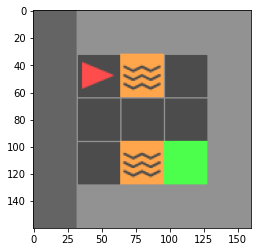

In [4]:
from experiments.minigrid.train_worker import gen_env
env = gen_env(config['env'])

plt.imshow(env.render('rgb_array'));

In [5]:
import torch
from rllr.env.wrappers import visualisation_wrapper
from rllr.utils.plotting import show_video

def play_episodes(config, agent_path, gen_env_fun, n=1, seed=0):
    
    def gen_monitor_env(env_id, save_video=True, seed=seed):
        env = gen_env_fun(config, env_id + seed)
        if save_video:
            env = visualisation_wrapper(env, '../../experiments/minigrid/artifacts/video/')
        return env

    agent = torch.load(agent_path)

    env = make_vec_envs(
        lambda env_id: lambda: gen_monitor_env(env_id),
        num_processes=1,
        device='cpu'
    )

    obs = env.reset()
    for _ in range(n):
        done = False
        while not done:
            value, action, _ = agent.act(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)

In [6]:
from experiments.minigrid.train_worker import gen_env_with_seed
config = ConfigFactory.parse_file('../../experiments/minigrid/conf/minigrid_lava_first_step.hocon')
agent_path = '../../experiments/minigrid/artifacts/models/minigrid_lava_worker.p'

In [7]:
play_episodes(config, agent_path, gen_env_with_seed)

(['goal_state', 'state'], {'goal_state': (28, 28, 3), 'state': (28, 28, 3)}, {'goal_state': dtype('uint8'), 'state': dtype('uint8')})
self.episode_id 0
self.episode_id 1


In [8]:
show_video('../../experiments/minigrid/artifacts/video/')

In [9]:
from experiments.minigrid.train_master import gen_env_with_seed
config = ConfigFactory.parse_file('../../experiments/minigrid/conf/minigrid_lava_second_step.hocon')
agent_path = '../../experiments/minigrid/artifacts/models/minigrid_lava_master.p'

import os
if 'worker_agent' in config:
    config['worker_agent']['path'] = os.path.join('../../experiments/minigrid/', config['worker_agent']['path'])

In [10]:
play_episodes(config, agent_path, gen_env_with_seed, n=3)

([None], {None: (28, 28, 3)}, {None: dtype('uint8')})
self.episode_id 0
self.episode_id 1
self.episode_id 2
self.episode_id 3


In [11]:
show_video('../../experiments/minigrid/artifacts/video/')

In [12]:
show_video('../../experiments/minigrid/artifacts/video/', idx=1)